In [38]:
## In this section we will do some preparation for later analysis and will show and visualize some descriptive statistics of the data

In [7]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [8]:
## loading the csv file which was created after scraping the IMDb website
imdb_top_movies = pd.read_csv("imdb_top_movies.csv")
imdb_top_movies = imdb_top_movies.astype({"year": int})

# quick clean
imdb_top_movies = imdb_top_movies.dropna( axis=0, how='all')

## removing all non-usd values in budget, as well as rows with empty budget values
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("EUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("BRL", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("JPY", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("FRF", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("INR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("DEM", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("GBP", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("KRW", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("AUD", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("RUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("TRL", na=False)]
imdb_top_movies = imdb_top_movies[imdb_top_movies.budget.str.contains("", na=False)]


## removing the commas and the Dollar sign, transforming the budget number to an int
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace(",","", regex=True)
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace("$","", regex=True).astype(int)


## cleaning the revenue data by removing Dollar signs, commas and dropping rows with NaN values. Also transforing the values into floats
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace(',', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace('$', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].dropna()
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].astype(float)

In [9]:
## transforming the year into decades
imdb_top_movies["decades"] = (imdb_top_movies["year"]//10)*10
imdb_top_movies["decades"].sort_values().value_counts()

2010    39
2000    38
1990    33
1980    26
1950    16
1970    15
1960    14
1940     8
1930     5
1920     4
Name: decades, dtype: int64

In [43]:
## Removing brackets for genres, country and language
imdb_top_movies["genres"] = imdb_top_movies["genres"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["country"] = imdb_top_movies["country"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["language"] = imdb_top_movies["language"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["starring"] = imdb_top_movies["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")


<ipython-input-43-5b8eb9749850>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  imdb_top_movies["genres"] = imdb_top_movies["genres"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
<ipython-input-43-5b8eb9749850>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  imdb_top_movies["country"] = imdb_top_movies["country"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
<ipython-input-43-5b8eb9749850>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as lit

In [44]:
## get overview of data
imdb_top_movies.head()

,Unnamed: 0,rank,IMDB_id,movie_name,year,director,starring,rating,number_of_reviews,genres,country,language,budget,box_office_revenue,runtime,decades
0,0,1,111161,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",9.3,2395380,Drama,USA,English,25000000,2.881729e+07,142,1990
1,0,2,68646,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",9.2,1659275,Crime Drama,USA,English Italian Latin,6000000,2.461210e+08,175,1970
2,0,3,71562,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall",9.0,1153451,Crime Drama,USA,English Italian Spanish Latin Sicilian,13000000,4.803578e+07,202,1970
3,0,4,468569,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,2357059,Action Crime Drama Thriller,USA UK,English Mandarin,185000000,1.005974e+09,152,2000
4,0,5,50083,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam",9.0,706423,Crime Drama,USA,English,350000,9.550000e+02,96,1950


In [11]:
# get info about data types
imdb_top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 247
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          198 non-null    int64  
 1   rank                198 non-null    int64  
 2   IMDB_id             198 non-null    int64  
 3   movie_name          198 non-null    object 
 4   year                198 non-null    int32  
 5   director            198 non-null    object 
 6   starring            198 non-null    object 
 7   rating              198 non-null    float64
 8   number_of_reviews   198 non-null    int64  
 9   genres              198 non-null    object 
 10  country             198 non-null    object 
 11  language            198 non-null    object 
 12  budget              198 non-null    int32  
 13  box_office_revenue  192 non-null    float64
 14  runtime             198 non-null    int64  
 15  decades             198 non-null    int32  
dtypes: float

In [14]:
# Show summary statistics for all numeric data
imdb_top_movies[["rating" ,"number_of_reviews", "budget", "box_office_revenue", "runtime"]].describe()

,rating,number_of_reviews,budget,box_office_revenue,runtime
count,198.000000,1.980000e+02,1.980000e+02,1.920000e+02,198.000000
mean,8.315152,6.441609e+05,3.622193e+07,2.342298e+08,129.707071
std,0.237313,4.804411e+05,5.586261e+07,3.664023e+08,29.452104
min,8.100000,4.756100e+04,1.330000e+05,9.550000e+02,67.000000
25%,8.100000,2.420730e+05,3.000000e+06,1.591320e+07,110.250000
50%,8.300000,5.623110e+05,1.500000e+07,7.530501e+07,126.500000
75%,8.400000,9.225918e+05,4.000000e+07,3.218548e+08,143.500000
max,9.300000,2.395380e+06,3.560000e+08,2.797501e+09,238.000000


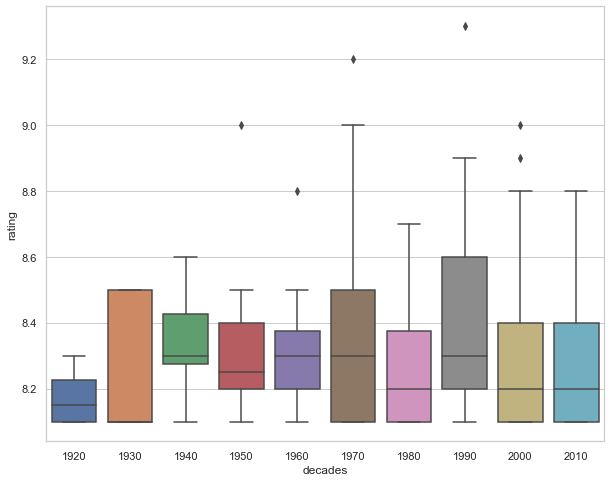

In [15]:
# Were movies better in earlier decades?
# Create a boxplot for rating of various decades
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="decades", y="rating", data=imdb_top_movies, orient="v")

Drama        145
Adventure     50
Thriller      48
Crime         41
Action        33
Comedy        32
Mystery       31
War           27
Sci-Fi        25
Romance       22
Fantasy       22
Family        21
Biography     21
Animation     17
History       12
Western        8
Sport          8
Music          7
Horror         4
Film-Noir      2
Musical        2
dtype: int64


<AxesSubplot:ylabel='Genres'>

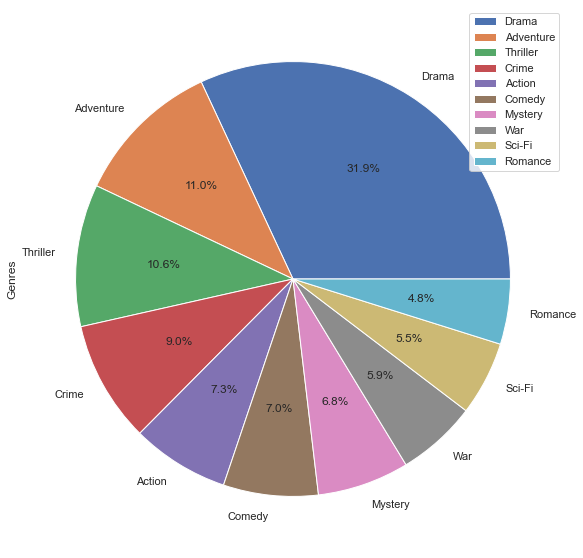

In [69]:
# Create a pie chart for the top 10 rated genres
genres_counts = imdb_top_movies["genres"].str.split(expand=True).stack().value_counts()
print(genres_counts)
new_dataframe = pd.DataFrame({"Genres": genres_counts},
                            )

# Creata dataframe for only the top 10
df4 = new_dataframe[:10].copy()

#Create pie chart for distribution of top 10 genres
df4.plot.pie(y = "Genres", figsize = (10,10), autopct='%1.1f%%')


USA               167
UK                 40
Germany            13
France             13
Italy              10
Japan               7
Spain               7
Canada              6
Australia           4
Mexico              4
South               4
West                3
Zealand             3
Korea               3
Sweden              3
New                 3
India               2
China               2
Ireland             2
Argentina           2
Iran                2
Austria             1
Algeria             1
Morocco             1
Kong                1
Africa              1
Poland              1
Lebanon             1
Qatar               1
Hong                1
Cyprus              1
Czechoslovakia      1
Denmark             1
Switzerland         1
Malta               1
dtype: int64


<AxesSubplot:ylabel='Country'>

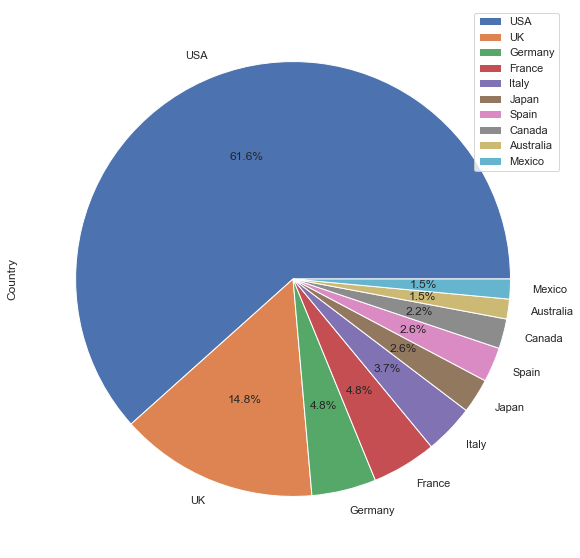

In [70]:
# Create a pie chart for the top 10 rated countries
country_counts = imdb_top_movies["country"].str.split(expand=True).stack().value_counts()
print(country_counts)
new_dataframe6 = pd.DataFrame({"Country": country_counts},
                            )

# Creata dataframe for only the top 10
df5 = new_dataframe6[:10].copy()

#Create pie chart for distribution of top 10 countries
df5.plot.pie(y = "Country", figsize = (10,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='Rating', ylabel='Runtime'>

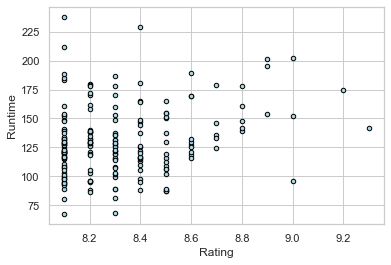

In [17]:
# Are longer movies better rated?
# Scatter plot of runtime and rating
df3 = pd.DataFrame({"Rating":imdb_top_movies["rating"], "Runtime": imdb_top_movies["runtime"]})
df3.plot.scatter(x = "Rating", y = "Runtime", color = 'lightblue', edgecolor = 'black')

<AxesSubplot:xlabel='Revenue', ylabel='Budget'>

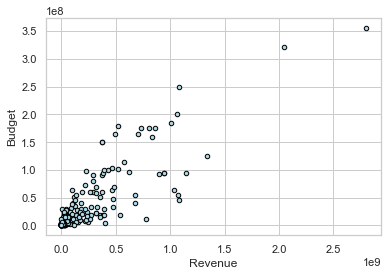

In [35]:
# Do more expensive movies generate more revenue?
# Scatter plot of budget and revenue
df4 = pd.DataFrame({"Revenue":imdb_top_movies["box_office_revenue"], "Budget": imdb_top_movies["budget"]})
df4.plot.scatter(x = "Revenue", y = "Budget", color = 'lightblue', edgecolor = 'black')


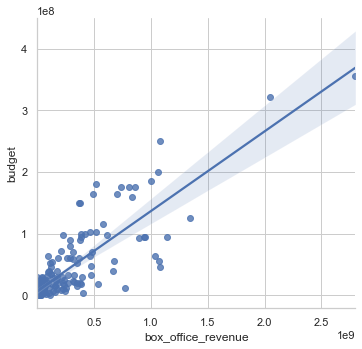

In [36]:
## Show distribution of Revenue and Budget with a regression line
sns.set_style('whitegrid')
sns.lmplot(x="box_office_revenue", y="budget", data=imdb_top_movies)

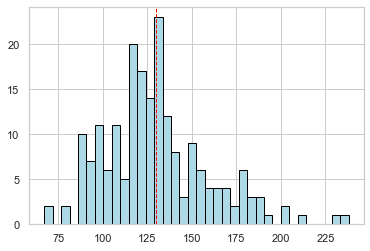

In [28]:
## have a look at different running times numerically but also visually

## make a histogram of the running time using matplot
plt.hist(imdb_top_movies["runtime"], color = 'lightblue', edgecolor = 'black',
         bins = int(180/5))
## add red line with the average runtime
plt.axvline(imdb_top_movies["runtime"].mean(), color='red', linestyle='dashed', linewidth=1)

In [30]:
## in a second step we would like to also define quantiles and then plot them
## define different quantilies 
q0 = imdb_top_movies["runtime"].quantile(0)
q25=imdb_top_movies["runtime"].quantile(0.25)
q50=imdb_top_movies["runtime"].quantile(0.5)
q75=imdb_top_movies["runtime"].quantile(0.75)
q100=imdb_top_movies["runtime"].quantile(1)

## filter each film based on its runtime and store it in a new value
first_quantile = imdb_top_movies[imdb_top_movies["runtime"] <= q25]
first_quantile_count = first_quantile["runtime"].count()

second_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q25) & (imdb_top_movies["runtime"] <= q50)]
second_quantile_count = second_quantile["runtime"].count()

third_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q50) & (imdb_top_movies["runtime"] <= q75)]
third_quantile_count = third_quantile["runtime"].count()

fourth_quantile = imdb_top_movies[imdb_top_movies["runtime"] > q75]
fourth_quantile_count = fourth_quantile["runtime"].count()

## calculate average running time of each quantile below and round results full numbers

q25_mean = round(sum(first_quantile["runtime"])/first_quantile_count)
q50_mean = round(sum(second_quantile["runtime"])/second_quantile_count)
q75_mean = round(sum(third_quantile["runtime"])/third_quantile_count)
q100_mean = round(sum(fourth_quantile["runtime"])/fourth_quantile_count)

## printing the quantiles and the average of each quantile below
print("There are",first_quantile_count,"movies with an average runtime of", q25_mean,"minutes in the first quantile (0-25%)")
print("There are",second_quantile_count,"movies with an average runtime of", q50_mean, "minutes in the second quantile (25-50%)")
print("There are",third_quantile_count,"movies with an average runtime of", q75_mean, "minutes in the third quantile (50-75%)")
print("There are",fourth_quantile_count,"movies with an average runtime of", q100_mean, "minutes in the fourth quantile (75-100%)")



There are 50 movies with an average runtime of 96 minutes in the first quantile (0-25%)
There are 49 movies with an average runtime of 119 minutes in the second quantile (25-50%)
There are 49 movies with an average runtime of 133 minutes in the third quantile (50-75%)
There are 50 movies with an average runtime of 170 minutes in the fourth quantile (75-100%)


In [ ]:
## Backup of Nils or MD code that currently doesnt work

In [34]:
fig, axs = plt.subplots(ncols = 3, nrows =
sns.regplot(x=imdb_top_movies["budget"], y=imdb_top_movies["rating"], ax=axs[0,0],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(x='rating', y='runtime', data=imdb_top_movies, ax=axs[0,1],
            scatter_kws={"color": "black", 's':2}, line_kws={"color": "red"})
sns.regplot(x='rating', y='box_office_revenue', data=imdb_top_movies, ax=axs[0,2],
            scatter_kws={"color": "black", 's':2}, line_kws={"color": "red"})
plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-34-90624a294978>, line 4)

ValueError: Could not interpret value `number of appearances` for parameter `x`

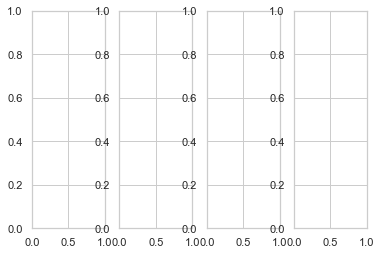

In [32]:
fig, axs = plt.subplots(ncols = 4, nrows = 1)
sns.histplot(x="number of appearances", y="movie length", data=first_quantile["runtime"],bins = int(180/5))